# Using Kmeans

In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


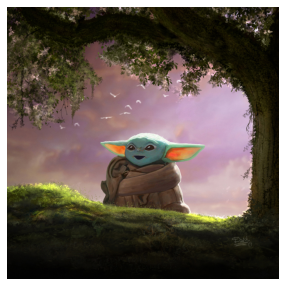

In [96]:
img=cv2.imread("Data Sets/Images_for_color_extration.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_image=img
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(img)

In [82]:
image_data=np.array(img)
original_shape=image_data.shape
image_data=image_data.reshape((-1,3))
image_data.shape
#image_data.reshape((100,100,-1))

(6553600, 3)

In [24]:
from sklearn.cluster import KMeans

In [85]:
dominant_color=6
k=dominant_color
km=KMeans(n_clusters=dominant_color)

In [86]:
km.fit(image_data)


KMeans(n_clusters=6)

In [87]:
centers=km.cluster_centers_

In [88]:
centers=np.array(centers,dtype='uint8')

In [89]:
centers

array([[ 88,  76,  53],
       [206, 176, 192],
       [ 16,  15,   5],
       [175, 143, 133],
       [ 49,  45,  22],
       [133, 106,  99]], dtype=uint8)

## print all colors which we got

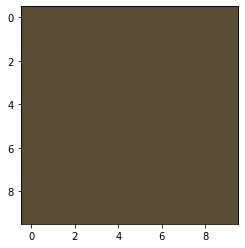

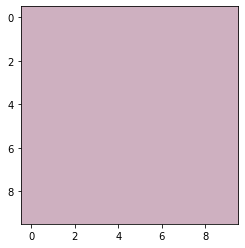

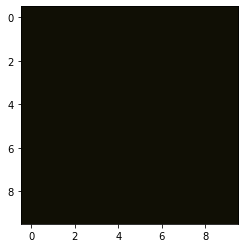

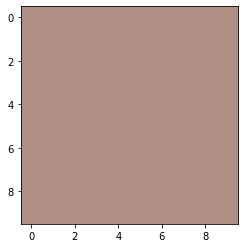

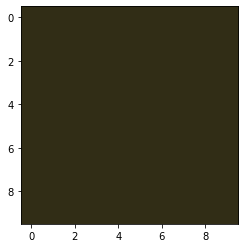

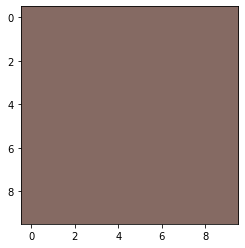

In [90]:
color_box={}
for k in range(centers.shape[0]):
    color_box[k]=np.zeros((10,10,3),dtype='uint8')
    color_box[k][:]=centers[k]
    plt.imshow(color_box[k])
    plt.show()

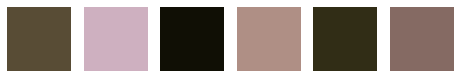

In [92]:
color_box={}
plt.figure(0,figsize=(8,2))
i=1
for k in range(centers.shape[0]):
    plt.subplot(1,dominant_color,i)
    i+=1
    color_box[k]=np.zeros((10,10,3),dtype='uint8')
    color_box[k][:]=centers[k]
    plt.axis("off")
    plt.imshow(color_box[k])


## Segmenting our Original Image

In [93]:
labels=km.labels_
type(labels)
labels.shape
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 777157,  863479, 2360941,  529430, 1091391,  931202], dtype=int64))

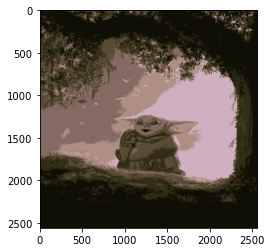

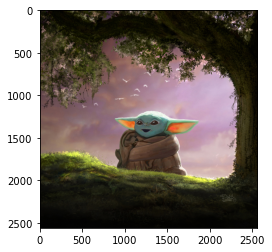

In [99]:
new_image=np.zeros(image_data.shape,dtype='uint8')
for ix in range(new_image.shape[0]):
    new_image[ix]=centers[labels[ix]]
new_image=np.reshape(new_image,original_shape)
plt.imshow(new_image)
plt.show()
plt.imshow(original_image)
plt.show()